In [12]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ipc_values = {}
baseline_ipc = {}

In [14]:
# Parsing log files for baseline and different prefetch degrees
base_dir = "../output/"
log_files = {
    "baseline": "baseline/no-no-1core",  # Log with no prefetcher
    "ip-stride": "task3/ip_stride-no-1core",
    "complex-stride": "task3/complex_stride-no-1core",
    "next-line": "task3/next_line-no-1core",
    "optimized": "task3/optimized-no-1core"

}

In [15]:
# Function to parse a Champsim log file
def parse_champsim_log(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

        # Find IPC
        ipc_match = re.search(r'CPU 0 cumulative IPC: ([\d\.]+)', log_data)
        ipc = float(ipc_match.group(1)) if ipc_match else 0

    return ipc

In [16]:
# Iterate through each log file and store IPC
for trace in range(3):
    t = {}
    for prefetcher, log_file in log_files.items():
        ipc = parse_champsim_log(base_dir + log_file + f"-trace{trace+1}.log")
        t[prefetcher] = ipc
    ipc_values[trace+1] = t

# Set baseline IPC and MPKI
for trace,ipc in ipc_values.items():
    baseline_ipc[trace] = ipc['baseline']

# Normalize IPC (speedup) to baseline
speedup_values = {}
for trace in range(3):
    speedup_values[trace+1] = {prefetcher: ipc / baseline_ipc[trace+1] for prefetcher, ipc in ipc_values[trace+1].items() if prefetcher != 'baseline'}

In [17]:
speedup_values

{1: {'ip-stride': 0.9864391316800978,
  'complex-stride': 0.9663824836721486,
  'next-line': 1.4062567406532553,
  'optimized': 1.3817057344615786},
 2: {'ip-stride': 3.309706917172155,
  'complex-stride': 3.6643793922268135,
  'next-line': 3.8006336981309277,
  'optimized': 3.7973700606791025},
 3: {'ip-stride': 1.2446854044799542,
  'complex-stride': 1.1926951062919104,
  'next-line': 0.8799757454701099,
  'optimized': 1.191054358681695}}

In [18]:
# Plotting graphs
def plot_for_trace(trace):
    # Bar plot for Speedup (IPC improvement)
    plt.figure(figsize=(6, 4))
    prefetcher = list(speedup_values[trace].keys())
    speedup = list(speedup_values[trace].values())


    # plt.ylim(0.98, 1.04)

    plt.title('Speedup (IPC Improvement)')
    plt.xlabel('Prefetcher')
    plt.ylabel('Speedup (Normalized to Baseline IPC)')

    plt.grid(True, axis='y')
    plt.bar(prefetcher, speedup, width = 0.6, color='dodgerblue')
    plt.savefig(f"../graphs/task3-speedup-trace{trace}.png")
    # Show the plots
    plt.show()


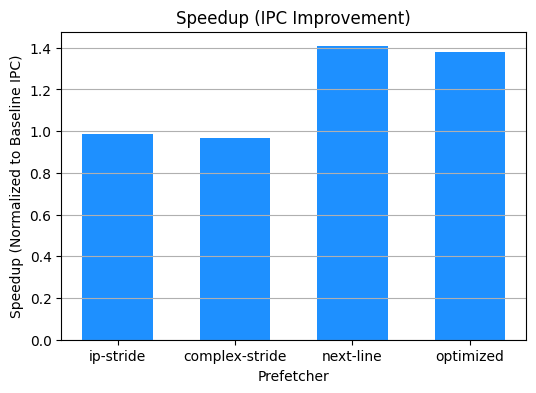

In [19]:
plot_for_trace(1)

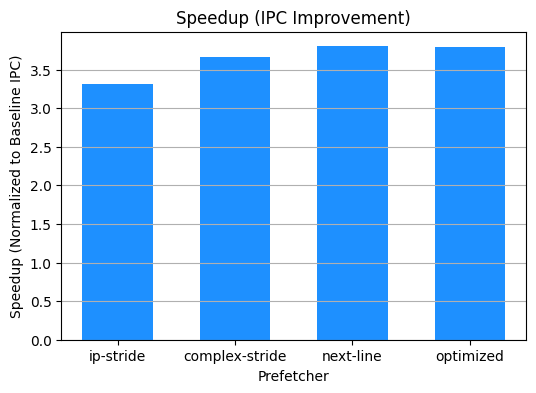

In [20]:
plot_for_trace(2)

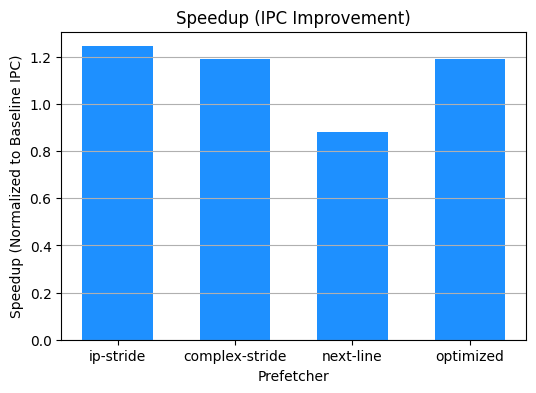

In [21]:
plot_for_trace(3)